In [2]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, brier_score_loss
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import importlib

import sys
sys.path.append('../')

from src.feature_engineering import FeatureGenerator

In [42]:
# feat_gen = FeatureGenerator()
# feat_gen()

In [3]:
train_df = pd.read_csv("../data/processed/train.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])
test_df = pd.read_csv("../data/processed/test.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])

test_df = test_df.loc[test_df["RED_WIN"].notnull()]

In [4]:
X_train = train_df.drop(columns=["RED_WIN"])
y_train = train_df["RED_WIN"]
X_test = test_df.drop(columns=["RED_WIN"])
y_test = test_df["RED_WIN"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegressionCV(cv=5, max_iter=300, n_jobs=-1, random_state=0, scoring="neg_log_loss")
clf.fit(X_train_scaled, y_train)

y_pred_train_prob = clf.predict_proba(X_train_scaled)[:, 1]
log_loss(y_train, y_pred_train_prob), roc_auc_score(y_train, y_pred_train_prob)

(0.631349606118153, 0.6827418784923251)

In [5]:
brier_score_loss(y_train, y_pred_train_prob)

0.2204719129963474

In [6]:
y_pred_train = clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.6458710846492364

In [7]:
y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]
log_loss(y_test, y_pred_prob), roc_auc_score(y_test, y_pred_prob)

(0.6203972261866999, 0.6939227933647347)

In [9]:
brier_score_loss(y_test, y_pred_prob)

0.21658796594128624

In [10]:
y_pred = clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.639821029082774

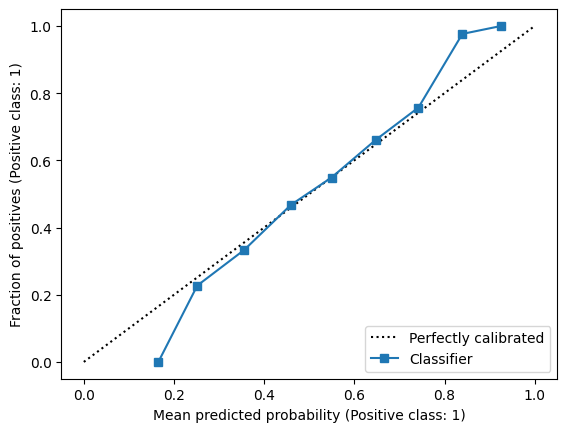

In [11]:
from sklearn.calibration import CalibrationDisplay

disp = CalibrationDisplay.from_predictions(y_test, y_pred_prob, n_bins=10)